# Test A Model on a Random Test Image

In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
from yaml import safe_load as yaml_load

import numpy as np
import tifffile
import matplotlib.pyplot as plt

from stardist import random_label_cmap

from keras_transfer_learning import model, dataset

lbl_cmap = random_label_cmap()

Using TensorFlow backend.


## List the models

In the following cell all available models in the model directory are listed. Choose one by copying its name to the next cell.

In [2]:
print('\n'.join(sorted([f.rpartition(os.path.sep)[-1] for f in glob.glob(os.path.join('.', 'models', '*'))])))

A00_unet_stardist_hl60-high-noise_P_002
A00_unet_stardist_hl60-high-noise_P_005
A00_unet_stardist_hl60-high-noise_P_010
A00_unet_stardist_hl60-high-noise_P_050
A00_unet_stardist_hl60-high-noise_P_200
A00_unet_stardist_hl60-high-noise_R_002
A00_unet_stardist_hl60-high-noise_R_005
A00_unet_stardist_hl60-high-noise_R_010
A00_unet_stardist_hl60-high-noise_R_050
A00_unet_stardist_hl60-high-noise_R_200
A00_unet_stardist_hl60-high-noise_R_F
A00_unet_stardist_hl60-low-noise_P_002
A00_unet_stardist_hl60-low-noise_P_005
A00_unet_stardist_hl60-low-noise_P_010
A00_unet_stardist_hl60-low-noise_P_050
A00_unet_stardist_hl60-low-noise_P_200
A00_unet_stardist_hl60-low-noise_R_002
A00_unet_stardist_hl60-low-noise_R_005
A00_unet_stardist_hl60-low-noise_R_010
A00_unet_stardist_hl60-low-noise_R_050
A00_unet_stardist_hl60-low-noise_R_200
A00_unet_stardist_hl60-low-noise_R_F
A01_unet_stardist_hl60-high-noise_P_002
A01_unet_stardist_hl60-high-noise_P_005
A01_unet_stardist_hl60-high-noise_P_010
A01_unet_stardi

In [3]:
model_name = 'C02_unet_stardist_dsb2018_R_F'

In [4]:
model_dir = os.path.join('.', 'models', model_name)
m = model.Model(model_dir=model_dir, load_weights='last')

Instructions for updating:
Colocations handled automatically by placer.


## Run The Model on a Random Example

Set the seed to some integer number to get the same example every time.

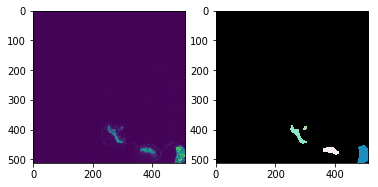

100%|██████████| 1/1 [00:00<00:00, 33.77it/s]


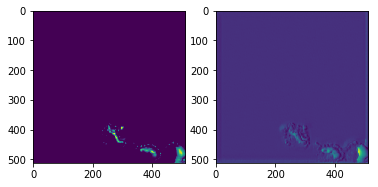

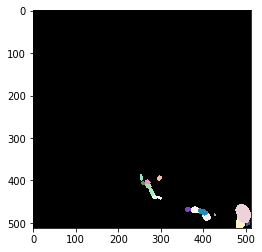

In [35]:
seed = None # Change to load another example

d = dataset.Dataset(m.config)

img, mask = d.get_random_test_img()

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=lbl_cmap)
plt.show()

# Run the model
pred = m.predict(img)[0]

# TODO plot for stardist
if isinstance(pred, tuple):
    plt.subplot(1, 2, 1)
    plt.imshow(pred[0][..., 0])
    plt.subplot(1, 2, 2)
    plt.imshow(pred[1][..., 0])
else:
    plt.imshow(pred[...,0], cmap='gray')
plt.show()


# Process the prediction
labels, scores = m.process_prediction(pred)[0]

# TODO labels vs segm
plt.imshow(labels, cmap=lbl_cmap)
plt.show()